In [12]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('select_top_10_percent____from___select_A.csv')

In [6]:
print(df.head())

                    S                    D  art_year  art_id
0        magnetometer   periodic breathing      1980  101167
1  periodic breathing  transcutaneous p o       1980  101167
2             infants  transcutaneous p o       1980  101167
3         development               gender      1980  101162
4             infants         magnetometer      1980  101167


In [9]:
G=nx.from_pandas_edgelist(df, 'S', 'D','art_year')

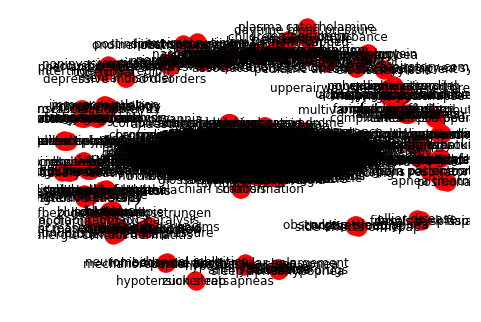

In [11]:
nx.draw(G, with_labels=True)

In [13]:
plt.show()

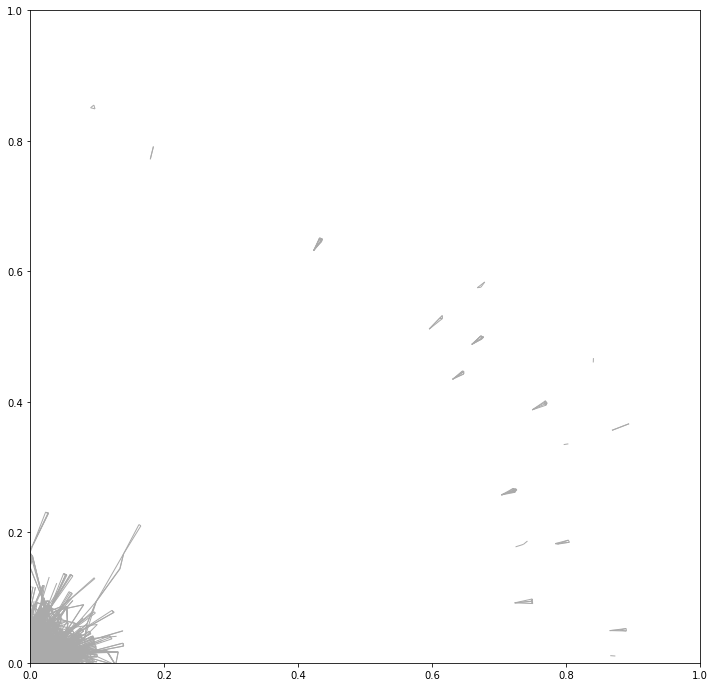

In [18]:
plt.figure(figsize=(12, 12))

# 2. Create a layout for our nodes 
layout = nx.spring_layout(G,iterations=50)

# 3. Draw the parts we want
nx.draw_networkx_edges(G, layout, edge_color='#AAAAAA')


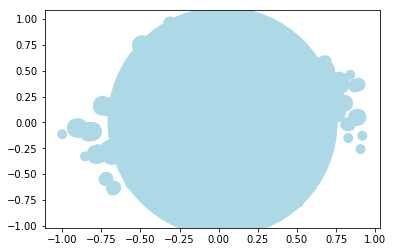

In [20]:
S = [node for node in G.nodes() if node in df.S.unique()]
size = [G.degree(node) * 80 for node in G.nodes() if node in df.S.unique()]
nx.draw_networkx_nodes(G, layout, nodelist=S, node_size=size, node_color='lightblue')

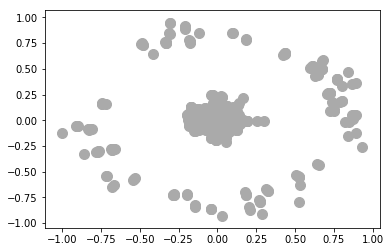

In [21]:
D = [node for node in G.nodes() if node in df.D.unique()]
nx.draw_networkx_nodes(G, layout, nodelist=D, node_size=100, node_color='#AAAAAA')

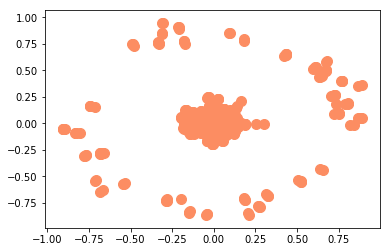

In [22]:
high_degree_D = [node for node in G.nodes() if node in df.D.unique() and G.degree(node) > 1]
nx.draw_networkx_nodes(G, layout, nodelist=high_degree_D, node_size=100, node_color='#fc8d62')

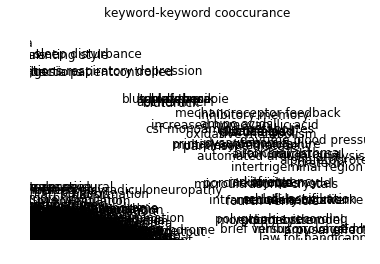

In [23]:
S_dict = dict(zip(S, S))
nx.draw_networkx_labels(G, layout, labels=S_dict)

# 4. Turn off the axis because I know you don't want it
plt.axis('off')

plt.title("keyword-keyword cooccurance")

# 5. Tell matplotlib to show it
plt.show()

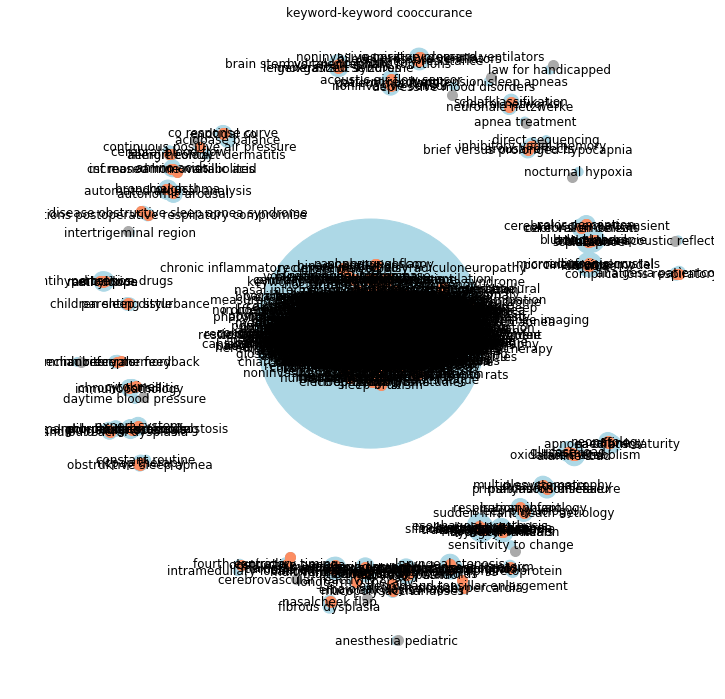

In [24]:
plt.figure(figsize=(12, 12))

# 2. Create a layout for our nodes 
layout = nx.spring_layout(G,iterations=50)

# 3. Draw the parts we want
nx.draw_networkx_edges(G, layout, edge_color='#AAAAAA')

S = [node for node in G.nodes() if node in df.S.unique()]
size = [G.degree(node) * 80 for node in G.nodes() if node in df.S.unique()]
nx.draw_networkx_nodes(G, layout, nodelist=S, node_size=size, node_color='lightblue')

D = [node for node in G.nodes() if node in df.D.unique()]
nx.draw_networkx_nodes(G, layout, nodelist=D, node_size=100, node_color='#AAAAAA')

high_degree_D = [node for node in G.nodes() if node in df.D.unique() and G.degree(node) > 1]
nx.draw_networkx_nodes(G, layout, nodelist=high_degree_D, node_size=100, node_color='#fc8d62')

S_dict = dict(zip(S, S))
nx.draw_networkx_labels(G, layout, labels=S_dict)

# 4. Turn off the axis because I know you don't want it
plt.axis('off')

plt.title("keyword-keyword cooccurance")

# 5. Tell matplotlib to show it
plt.show()

In [26]:
G.nodes()

NodeView(('magnetometer', 'periodic breathing', 'transcutaneous p o ', 'infants', 'development', 'gender', 'sleep apnea', 'tracheostomy', 'respiration', 'sleep state', 'apnea', 'hypersomnia with respiratory disturbance', 'idiopathic alveolar hypoventilation', 'zuelzerwilson syndrome', 'pulmonary hypertension', 'slow wave sleep', 'apneusis', 'wakefulness', 'vagotomy', 'rapid eye movement sleep', 'hemodynamics', 'pulmonary wedge pressure', 'hirschsprung disease', 'ondine curse', 'otal colonic aganglionosis', 'apnoea', 'preterm babies', 'central', 'obstructive', 'electrophrenic pacing', 'phrenic nerve', 'pneumotaxic lesion', 'sleepapnea', 'bradycardia', 'quadriparesis', 'postcordotomy apnea', 'periodic movements', 'cheynestokes breathing', 'food intake', 'neonates', 'hypoxia', 'central apnoea', 'ventilation', 'qt interval', 'sudden infant death syndrome', 'carbon dioxide', 'control of breathing', 'hypercapnia', 'bioavailability', ' h holter ecg', 'respiratory resistive load', 'aging', 'de

In [27]:
degrees = list(nx.degree(G))

In [31]:
pd.DataFrame([list(d) for d in degrees], columns=['ID', 'degree']).sort_values('degree', ascending=False).head(40)

,ID,degree
6,sleep apnea,656
68,sleep,389
161,obstructive sleep apnea,389
69,snoring,293
128,polysomnography,276
10,apnea,270
84,sleep apnea syndrome,261
79,sleep apnoea,225
163,obstructive sleep apnoea,201
156,obesity,155


In [42]:
for (u, v, d) in G.edges(data='art_year'):
    if d < 1982:
        print(u, v, d)

magnetometer periodic breathing 1980
magnetometer infants 1980
magnetometer apnea 1980
magnetometer transcutaneous p o  1980
periodic breathing transcutaneous p o  1980
transcutaneous p o  infants 1980
transcutaneous p o  apnea 1980
development gender 1980
development sleep state 1980
development respiration 1980
gender respiration 1980
gender sleep state 1980
gender apnea 1980
sleep apnea tracheostomy 1980
sleep apnea hypersomnia with respiratory disturbance 1980
sleep apnea phrenic nerve 1981
sleep apnea electrophrenic pacing 1981
sleep apnea postcordotomy apnea 1981
sleep apnea quadriparesis 1981
tracheostomy hypersomnia with respiratory disturbance 1980
respiration sleep state 1980
apnea slow wave sleep 1981
apnea vagotomy 1981
apnea apneusis 1981
apnea pneumotaxic lesion 1981
apnea rapid eye movement sleep 1981
idiopathic alveolar hypoventilation zuelzerwilson syndrome 1981
idiopathic alveolar hypoventilation pulmonary hypertension 1981
idiopathic alveolar hypoventilation hirschsp

In [43]:
list(nx.connected_components(G))

[{'posterior fossa decompression',
  'calcitonin generelated peptide',
  'apparent lifethreatening events',
  'lefort osteotomy',
  'mandibular setback',
  'waldeyer ring',
  'rem',
  'associated psychopathology',
  'cardiac arrhythmia',
  'pharyngeal airway',
  'continuous positive airway',
  'pulmonary artery pressure',
  'histochemical properties',
  'contractile proteins',
  'ret receptor tyrosine kinase',
  'glossopharyngeal neuralgia',
  'phasic events',
  'dyspnea',
  'lingual tonsils',
  'chronic headaches',
  'cortisol',
  'upper airway occlusion',
  'map',
  'nocturnal oxygen desaturation',
  'positivepressure respiration',
  'coronary bypass surgery',
  'megadolichovertebrobasilar anomaly',
  'neuromuscular relaxants',
  'monitoring',
  'sleepwakefulness classification',
  'neuropathology',
  'ambulatory device',
  'sleepingwaking rhythm',
  'infant sleep apnoea',
  'pharmacokinetics',
  'high altitude',
  'starling resistor',
  'endotracheal tube',
  'muscle fiber area',
  

In [44]:
nx.degree(G)

DegreeView({'magnetometer': 4, 'periodic breathing': 76, 'transcutaneous p o ': 4, 'infants': 46, 'development': 36, 'gender': 13, 'sleep apnea': 656, 'tracheostomy': 16, 'respiration': 84, 'sleep state': 14, 'apnea': 270, 'hypersomnia with respiratory disturbance': 2, 'idiopathic alveolar hypoventilation': 5, 'zuelzerwilson syndrome': 5, 'pulmonary hypertension': 48, 'slow wave sleep': 11, 'apneusis': 6, 'wakefulness': 23, 'vagotomy': 6, 'rapid eye movement sleep': 21, 'hemodynamics': 13, 'pulmonary wedge pressure': 2, 'hirschsprung disease': 15, 'ondine curse': 35, 'otal colonic aganglionosis': 5, 'apnoea': 63, 'preterm babies': 4, 'central': 17, 'obstructive': 50, 'electrophrenic pacing': 4, 'phrenic nerve': 29, 'pneumotaxic lesion': 6, 'sleepapnea': 2, 'bradycardia': 28, 'quadriparesis': 4, 'postcordotomy apnea': 4, 'periodic movements': 5, 'cheynestokes breathing': 15, 'food intake': 4, 'neonates': 13, 'hypoxia': 137, 'central apnoea': 9, 'ventilation': 58, 'qt interval': 10, 'sud

In [47]:
df.columns= ["s", "d", "year","id"]

In [50]:
print(df.year.min())

1980
